### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into new year. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In this year, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx) or you can just use this link https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx. It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

#### Scoring Rubric (Total 100 points)




1.   Class Attendance: 0 / 10

2.   On-time Submission:  0 / 10

3.   EDA Quality & Visualisations:
*   Correct loading and checking of data: 0 / 5
*   Meaningful descriptive stats: 0 / 5
*   At least 2 clear plots with short interpretations: 0 / 5 / 10

4.   Data Preprocessing & Basket Creation
*   Proper column selection and cleaning decisions explained: 0 / 10
*   Correct aggregation to transaction level and one-hot encoding: 0 / 10

5.   ARM Implementation (Apriori Rules)
*   Correct use of apriori() with appropriate min_support values: 0 / 10
*   Correct use of association_rules() with appropriate filtering: 0 / 10

6.   Insights & Business Recommendations
*   Interpretation of rules: 0 / 10
*   Realistic managerial actions:  0 / 10

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

# !pip install mlxtend==0.23.1


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\miche\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **Loading Dataset**

In [5]:
#1
# load the data set ans show the first five transaction
df = pd.read_excel("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx")
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


## **Exploratory Data Analysis (EDA)**
### **Data Overview**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [7]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'KD_SBR': array(['IN', nan], dtype=object),
 'TP_TRN': array(['JUL', 'TRM', 'REJ', 'MTS', 'REB', 'ADJ', nan], dtype=object),
 'KDSUP': array([  nan,  999.,   29.,   30.,   35.,    0.,   54.,  846.,   27.,
          28.,  237.,   62.,  265.,    8.,  400., 1033.,    7., 1632.,
        1726., 1264.,  121., 1354., 1046., 1016.,  663.,  701.,  590.,
         209.,   33.,  227.,  758., 1769., 1639.,  257.,  728., 1356.,
         441.,  130., 1757.,  684.,   56., 1523.,   26.,  763.,  199.,
         172.,  106.,  453.,  457.,  391.,  733.,  757.,   17., 1288.,
         497.,   96.,   38.,  134., 1706.,  603.,  458.,  912.,  570.,
         168.,  191.,  157.,  455.,  530.,  401.,  752., 1061.,  664.,
        1220.,  397.,  193.,  592., 1537.,  233.,   69.,   24.,  166.,
          61.,  159., 1224.,  182.,  216.,   74., 1352.,  393., 1599.,
        1273.,  959., 1595., 1734., 1066., 1254.,  562., 1678.,  698.,
         153.,  927.,   57.,  113.,  179.,  126.,  337.,    4.,    2.,
          31.

In [16]:
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


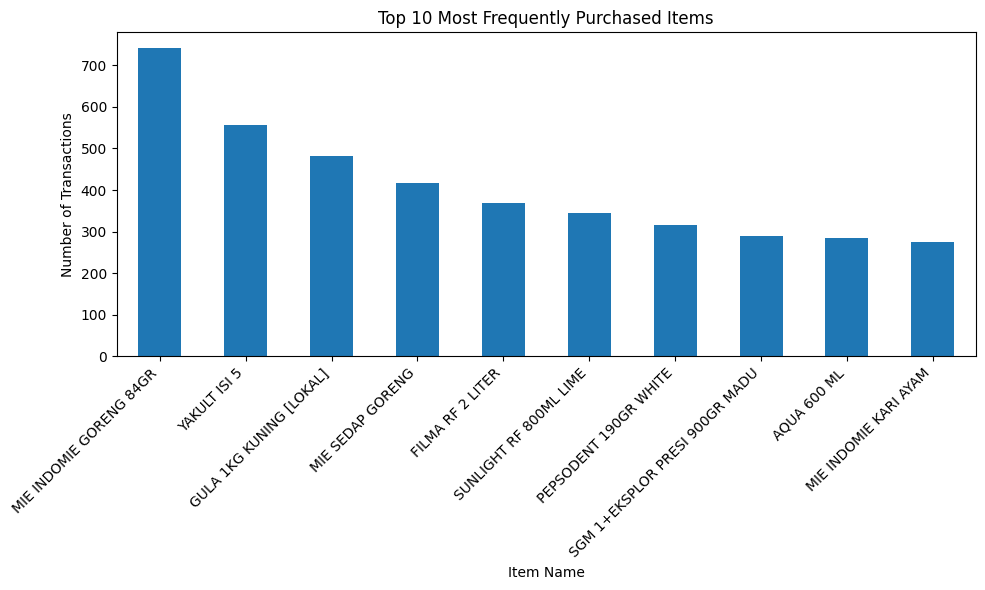

In [17]:
import matplotlib.pyplot as plt

top_items = df['NAMA'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_items.plot(kind='bar')
plt.title("Top 10 Most Frequently Purchased Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart shows that Mie Indomie Goreng 84gr is the most frequently purchased item by a wide margin, indicating it is a staple product with consistently high demand. This is followed by Yakult (isi 5) and Gula 1kg Kuning (Lokal), which also appear to be essential household items with strong purchase frequency. Several other daily-use products such as Mie Sedap Goreng, Filma 2 Liter, and Sunlight 800ml also rank high, suggesting that customers predominantly buy fast-moving consumer goods (FMCG). Overall, the chart highlights a clear pattern where basic food items, beverages, and household necessities dominate the top transactions, reflecting typical supermarket consumer behavior.

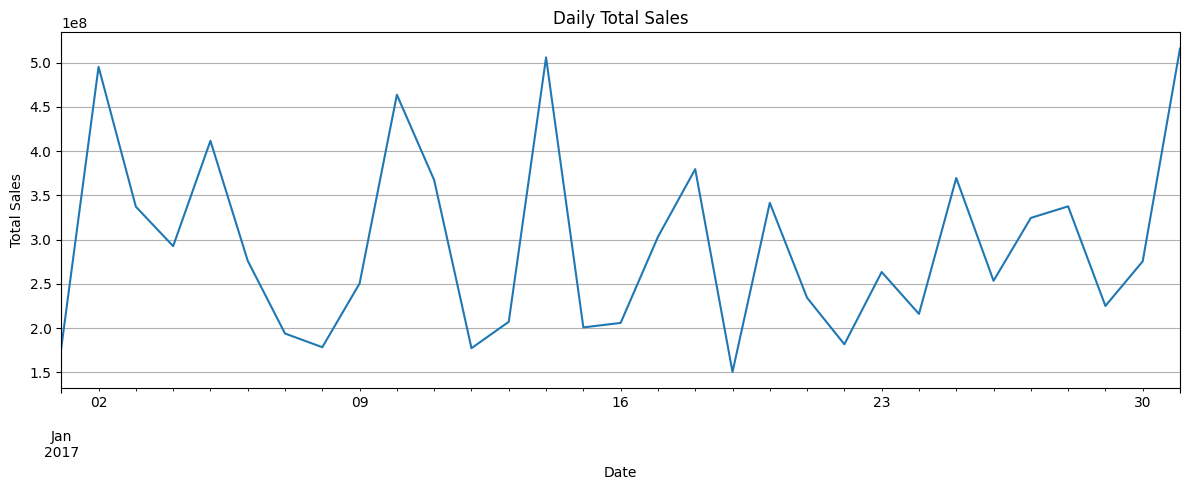

In [18]:
df_daily = df.groupby('TGL_TRANS')['JLH_TRANS'].sum()

plt.figure(figsize=(12,5))
df_daily.plot()
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

The daily sales trend shows that total sales fluctuate significantly throughout January, with multiple sharp peaks and dips. The highest spikes, reaching above 500 million rupiah, occur around the beginning, middle, and end of the month, suggesting periods of increased shopping activity that may align with common pay cycles or restocking patterns. Meanwhile, noticeable drops in sales indicate slower shopping days, likely weekdays or non-peak periods. Overall, the pattern reflects a typical supermarket demand cycle: strong bursts of spending at predictable intervals, followed by gradual declines before rising again.

### **Data Pre-Processing**

In [ ]:
# kolom-kolom ini dihapus karena kebanyakan berisi missing value atau memiliki value yang sama pada setiap baris

columns_to_drop = ['DISC2', 'GGD', 'KD_SBR', 'TP_TRN', 'KDSUP','KAS', 'TRN_DK','GDG','KDSLS', 'BIN','KDBIN','NO_ORD', 'STS_BYR', 'SLD_AK', 'SLD_AKG', 'HRGBL_OLD', 'DISC', 'DISC1', 'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD','HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN', 'PPN_OLD', 'PPNBM', 'PPNBM_OLD','KET_TRANS', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS','TRNBL', 'POST', 'TGL_OLD', 'SUPPLIER', 'DEP_SWA', 'GON', 'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'LAMA_CRD']
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned = df_cleaned.dropna(subset=['HRG_OLD'])
df_cleaned.head()

,KEL,ITEM,NAMA,TGL_TRANS,NO_BKT,QTY,HRG_OLD,HRG_PKK,HRG_JUL,JLH_TRANS,FILLER,TANGGAL,JAM
0,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,060102001,2.0,1100.0,549.98,1100.0,2200.0,1.701022e+11,2017-01-02,08:12:02
1,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,060102002,1.0,23000.0,20640.45,23000.0,23000.0,1.701029e+11,2017-01-02,08:24:51
2,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,060102003,1.0,9500.0,8720.00,9500.0,9500.0,1.701030e+11,2017-01-02,08:28:18
3,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,060102003,1.0,6900.0,6215.00,6900.0,6900.0,1.701020e+11,2017-01-02,08:28:22
4,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,060102003,1.0,13500.0,12119.65,13500.0,13500.0,1.701020e+11,2017-01-02,08:28:20


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145702 entries, 0 to 148488
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   KEL        145702 non-null  object        
 1   ITEM       145702 non-null  float64       
 2   NAMA       145702 non-null  object        
 3   TGL_TRANS  145702 non-null  datetime64[ns]
 4   NO_BKT     145702 non-null  object        
 5   QTY        145702 non-null  float64       
 6   HRG_OLD    145702 non-null  float64       
 7   HRG_PKK    145702 non-null  float64       
 8   HRG_JUL    145702 non-null  float64       
 9   JLH_TRANS  145702 non-null  float64       
 10  FILLER     145702 non-null  float64       
 11  TANGGAL    145702 non-null  datetime64[ns]
 12  JAM        145702 non-null  object        
dtypes: datetime64[ns](2), float64(7), object(4)
memory usage: 15.6+ MB


## **Applying the Apriori Algorithm**
### **Data Preparation for Apriori**

In [21]:
basket = (
    df
    .groupby(["NO_BKT", "NAMA"])["NAMA"]
    .count()
    .unstack()
    .fillna(0)
)

basket.head()


NAMA,4 RACK MILK POWDER COUN 08-022,A.M MADU BALITA 150ML,A.M MADU LENGKENG 250ML,A.M MADU SUPER LENGKENG 625ML,A.M ROYAL JELLY 150ML AUSTRALI,A.M ROYAL JELLY 250M,A.M ROYAL JELLY 250ML AUSTRALI,A.T.B MARIE SUSU 185GR,ABC 9 VOLT,ABC ALKALINE A2 LR-0,...,ZWITSAL POWDER 100GR EX C.ZINC,ZWITSAL POWDER 300GR,ZWITSAL POWDER 300GR EX.CARE,ZWITSAL POWDER 300GR NAT ML&HN,ZWITSAL POWDER 300GR SF.FLORAL,ZWITSAL POWDER 500GR BOUNTY FF,ZYLUC BLACK CRACK 45G COKLAT,ZYLUC BLACK CRACK 45G ORANGE,ZYLUC BLACK CRACK 45G TIRAMISU,ZYLUC STICK 45GR CHO
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()

C:\Users\miche\AppData\Local\Temp\ipykernel_10452\326423999.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


NAMA,4 RACK MILK POWDER COUN 08-022,A.M MADU BALITA 150ML,A.M MADU LENGKENG 250ML,A.M MADU SUPER LENGKENG 625ML,A.M ROYAL JELLY 150ML AUSTRALI,A.M ROYAL JELLY 250M,A.M ROYAL JELLY 250ML AUSTRALI,A.T.B MARIE SUSU 185GR,ABC 9 VOLT,ABC ALKALINE A2 LR-0,...,ZWITSAL POWDER 100GR EX C.ZINC,ZWITSAL POWDER 300GR,ZWITSAL POWDER 300GR EX.CARE,ZWITSAL POWDER 300GR NAT ML&HN,ZWITSAL POWDER 300GR SF.FLORAL,ZWITSAL POWDER 500GR BOUNTY FF,ZYLUC BLACK CRACK 45G COKLAT,ZYLUC BLACK CRACK 45G ORANGE,ZYLUC BLACK CRACK 45G TIRAMISU,ZYLUC STICK 45GR CHO
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [27]:
from mlxtend.frequent_patterns import apriori, association_rules
df_apriori = apriori(basket, min_support = 0.002, use_colnames = True)
df_apriori

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.002132,(ABC KECAP 520ML RF MANIS)
1,0.004619,(ANGPAO PDK/[M] [GOLDEN.S])
2,0.004400,(AQUA 1500ML)
3,0.007789,(AQUA 600 ML)
4,0.002132,(AVAIL FC PANTLNR 20S HIJAU)
...,...,...
214,0.003881,"(MIE INDOMIE KARI AYAM, MIE INDOMIE GORENG 84GR)"
215,0.002323,"(MIE INDOMIE SOTO MIE, MIE INDOMIE GORENG 84GR)"
216,0.002159,"(MIE INDOMIE SOTO SPECIAL, MIE INDOMIE GORENG ..."
217,0.002159,"(MIE SEDAP GORENG, MIE INDOMIE GORENG 84GR)"


In [28]:
df_ar = association_rules(df_apriori, metric = "lift", min_threshold = 1)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MIE INDOMIE KARI AYAM),(MIE INDOMIE GORENG 84GR),0.007543,0.020280,0.003881,0.514493,25.369624,0.003728,2.017931,0.967884
1,(MIE INDOMIE GORENG 84GR),(MIE INDOMIE KARI AYAM),0.020280,0.007543,0.003881,0.191375,25.369624,0.003728,1.227338,0.980467
2,(MIE INDOMIE SOTO MIE),(MIE INDOMIE GORENG 84GR),0.005494,0.020280,0.002323,0.422886,20.852476,0.002212,1.697618,0.957303
3,(MIE INDOMIE GORENG 84GR),(MIE INDOMIE SOTO MIE),0.020280,0.005494,0.002323,0.114555,20.852476,0.002212,1.123172,0.971751
4,(MIE INDOMIE SOTO SPECIAL),(MIE INDOMIE GORENG 84GR),0.004537,0.020280,0.002159,0.475904,23.466794,0.002067,1.869351,0.961750
5,(MIE INDOMIE GORENG 84GR),(MIE INDOMIE SOTO SPECIAL),0.020280,0.004537,0.002159,0.106469,23.466794,0.002067,1.114078,0.977204
6,(MIE SEDAP GORENG),(MIE INDOMIE GORENG 84GR),0.011397,0.020280,0.002159,0.189448,9.341698,0.001928,1.208708,0.903248
7,(MIE INDOMIE GORENG 84GR),(MIE SEDAP GORENG),0.020280,0.011397,0.002159,0.106469,9.341698,0.001928,1.106400,0.911437
8,(MIE SEDAP GORENG),(MIE SEDAP RASA SOTO),0.011397,0.006915,0.002350,0.206235,29.825006,0.002272,1.251107,0.977613
9,(MIE SEDAP RASA SOTO),(MIE SEDAP GORENG),0.006915,0.011397,0.002350,0.339921,29.825006,0.002272,1.497704,0.973201


## Conclusion: The Impact of Data Analysis
As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



The association rules reveal that Indomie Goreng 84gr acts as a central anchor product in customer baskets, showing very strong relationships (lift > 25) with other Indomie variants such as Kari Ayam, Soto Mie, and Soto Special. This indicates that customers who buy one Indomie variant are highly likely to purchase additional variants in the same transaction, forming strong cross-selling patterns. Similarly, strong associations appear within the Mie Sedap brand, especially between Mie Sedap Goreng and Mie Sedap Soto, suggesting that customers often purchase multiple flavors together. From a business perspective, these insights can be leveraged through bundled promotions across variants, shelf placement strategies that group highly associated items together, and targeted cross-promotions such as “Buy 2 Indomie variants, save X%.” Retailers should also ensure higher stock levels for key anchor products—particularly Indomie Goreng 84gr—to avoid stockouts. Overall, these association patterns highlight significant opportunities to boost sales through bundling, cross-selling, and planogram optimization based on item co-occurrence.